#**Análise de crédito: o que é e como funciona o processo?**

Fundamental para a concessão de empréstimos, a análise de crédito envolve a avaliação de diferentes informações sobre o consumidor. Analisar o crédito de um cliente consiste em verificar se ele realmente tem condições de honrar o compromisso assumido. O objetivo é identificar o perfil e as condições financeiras do cliente, a partir de suas informações básicas e de seus dados financeiros. Assim, a empresa também define um valor mínimo de compra, a taxa de juros aplicada e o prazo de pagamento das parcelas.

<center><img alt="Analisando Airbnb" width="40%" src="https://images.pexels.com/photos/5816298/pexels-photo-5816298.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260"></center>

Por suas características, esse processo é uma forma de evitar calote nas operações de crédito. Ao mesmo tempo, ajuda a garantir a estabilidade financeira do seu negócio e manter as contas organizadas.

##**O que acontece depois da análise de crédito?**
Após concluir a análise de crédito, a instituição financeira já tem as informações necessárias sobre o consumidor e pode definir as condições que serão oferecidas na operação. Em modalidades como o cheque especial e o cartão de crédito, o valor é liberado automaticamente após a aprovação da análise. Ao optar por outras linhas, como o empréstimo pessoal e o empréstimo com garantia, solicitante é informado sobre as possibilidades oferecidas pela instituição financeira e escolhe a que melhor se adequa ao seu orçamento. 


### Usaremo o dataset fornecido pelo EBAC do curso de ''cientista de dados'', iremos analisar e tirar insight desses dados.

#**Análise dos Dados**

In [1]:
pip install pywaffle -q

     |████████████████████████████████| 565 kB 5.1 MB/s 


In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle
from matplotlib import colors

In [3]:
# importar o arquivo .csv para um DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')



##**Análise Exploratória**

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas, com objetivo de entender melhor como nossos dados estão estruturados, observando o nome das colunas para formação do nosso dicionário.

In [4]:
# mostrar as 5 primeiras entradas
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


####**Dicionário com nomes da colunas do dataset**

##* `id` - numero da conta;
##* `default` - 0 ( Clientes adimplentes ) 1 (Clientes inadimplentes);
##* `idade` - idade dos clientes;
##* `sexo` - M (masculino) F (feminino);
##* `dependentes` - numero de pessoas que o titular tem de pedentes;
##* `escolaridade` - escolaridade dos clientes;
##* `estado_civil` - Estado civil dos cliente;
##* `salario_anual` - Valor total de recebido no ano pelo cliente;
##* `tipo_cartao` - cor do cartao do cliente;
##* `meses_de_relacionamento` - Quantidade de meses que o cliente tem conta no banco;
##* `qtd_produtos` - Numero de serviços que o cliente tem com o banco;
##* `iteracoes_12m` - Numero de iteraçoes do cliente com o banco;
##* `meses_inativo_12m` - Quantidade de meses que o cliente ficou inativo;
##* `limite_credito	` - valor que o cliente tem disponivel com o banco;
##* `valor_transacoes_12m` - valor das transferencias da conta do titular nos ultimos 12 meses;
##* `qtd_transacoes_12m` - numero de transferencias no ultimos 12 meses.


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Colunas:\t {}\n".format(df.shape[1]))

# verificar os tipos das colunas do dataset
display(df.dtypes)

Entradas:	 10127
Colunas:	 16



id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

####**Temos 10127 linhas, e 16 colunas, que sao caracteristicas dos nossos clientes, cada coluna desta esta explicada no nosso dicionario!**

**Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes, em %
display(round(df.isnull().sum() / df.shape[0] * 100, 2).sort_values(ascending=False))

escolaridade               15.00
salario_anual              10.98
estado_civil                7.40
id                          0.00
default                     0.00
idade                       0.00
sexo                        0.00
dependentes                 0.00
tipo_cartao                 0.00
meses_de_relacionamento     0.00
qtd_produtos                0.00
iteracoes_12m               0.00
meses_inativo_12m           0.00
limite_credito              0.00
valor_transacoes_12m        0.00
qtd_transacoes_12m          0.00
dtype: float64

In [7]:
#verifica a quatidade de linhas faltando com relação ao total
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  for stat in stats_dados_faltantes:
    print(stat)

In [8]:
# Porcentagem de dados faltando total
print('#' * 90)
stats_dados_faltantes(df=df)
print('#' * 90)
# Porcentagem de dados faltando com relação aos Adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])
print('#' * 90)
# Porcentagem de dados faltando com relação aos inadimplentes 
stats_dados_faltantes(df=df[df['default'] == 1])
print('#' * 90)


##########################################################################################
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}
##########################################################################################
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}
##########################################################################################
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}
##########################################################################################


####Temos 3 colunas com valores ausentes, `escolaridade` com 15% dos valores ausente nesta coluna, `salario_anual` com 10.98% de valores ausentes, essa coluna e umas das mais importante para analise de credito, `estado_civil` com 7.40% dos valores ausente.

Neste dataset 83.93% dos clientes sao adimplentes e 16.07% sao inadimplentes!


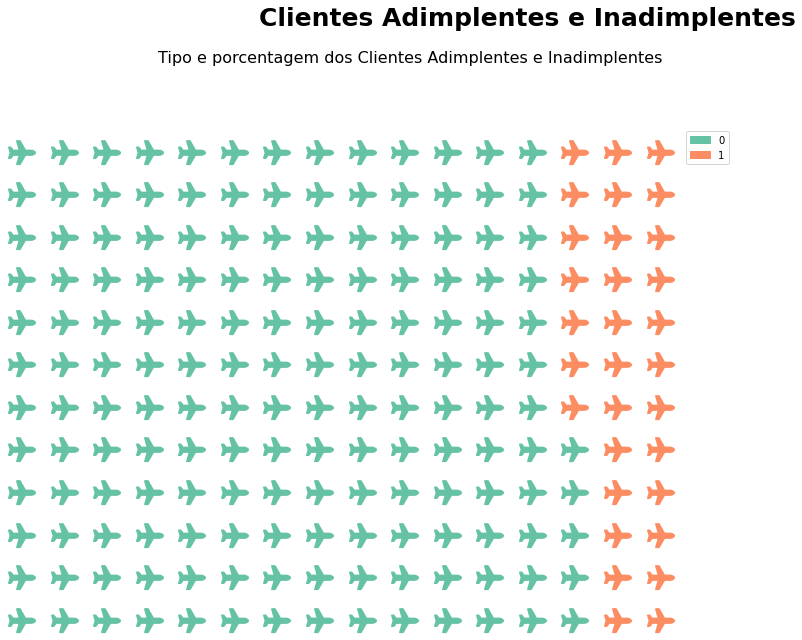

In [9]:
# mostrar a % de Clientes Adimplentes e Inadimplentes

data = dict(df['default'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(15,9),
    rows=12,
    columns=16,
    values=data, icons='plane', icon_size=25,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)}
)

plt.text(0.5, 1.2, 'Clientes Adimplentes e Inadimplentes',
         fontsize=25, 
         color="#000000",
         weight='bold')

plt.text(0.3, 1.15,
         "Tipo e porcentagem dos Clientes Adimplentes e Inadimplentes",
         verticalalignment="top",
         fontsize=16,
         color="#000000")

fig.set_tight_layout(True)
plt.savefig('resultado7.png');
# % de clientes
total_cliente, _ =df.shape
qtd_adi, _ = df[df['default'] == 0].shape
qtd_ina, _ = df[df['default'] == 1].shape

print(f"Neste dataset {round(100 * qtd_adi / total_cliente, 2)}% dos clientes sao adimplentes \
e {round(100 * qtd_ina / total_cliente, 2)}% sao inadimplentes!")

####Neste dataset 83.93% dos clientes sao adimplentes e 16.07% sao inadimpletes!. 
Se fossemos analisar o cliente inadimplentes, teriamos poucos dados para entender o que leve um cliente a ser inadimplente, o grafico deixa bem claro a maioridades dos clientes adimplente.


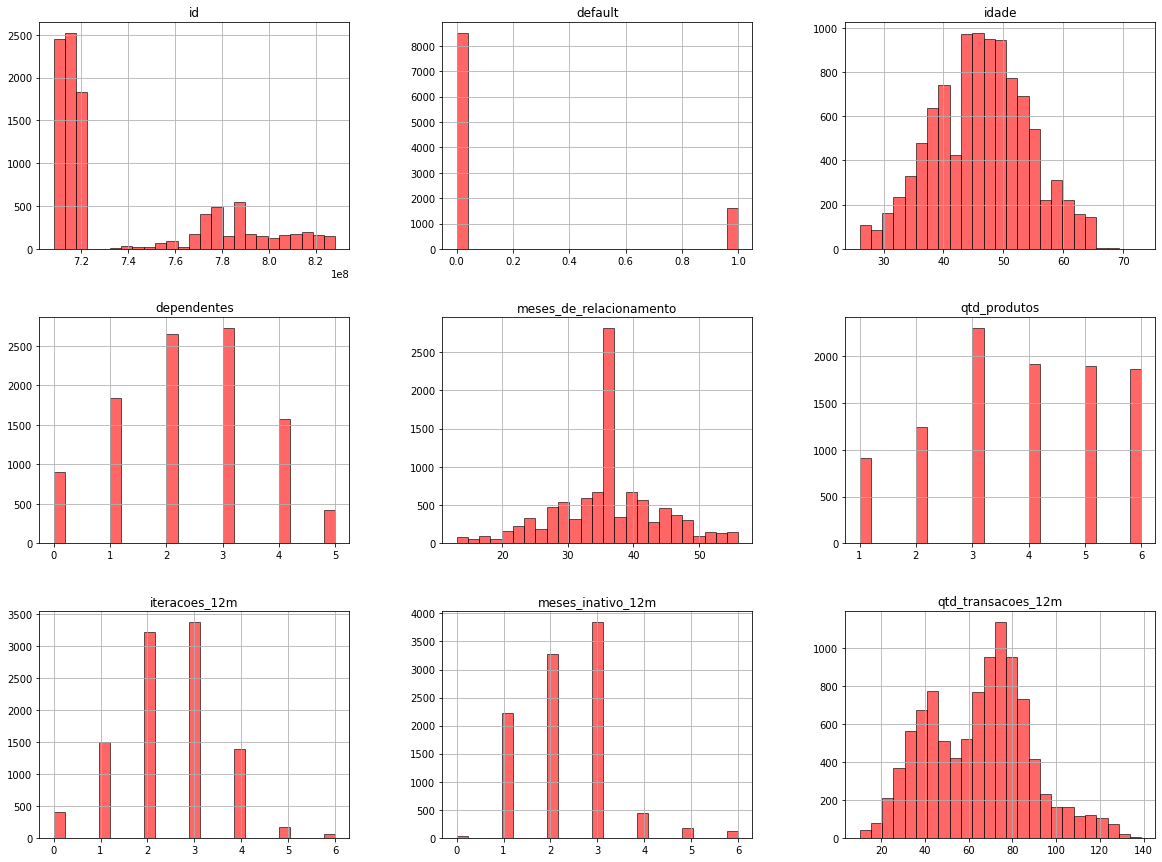

In [10]:
#Histograma com as colunas do dataset
df.hist(bins=25, figsize=(20,15), rwidth=1, color='red', edgecolor='black', alpha=0.6);
plt.savefig('resultado.png')

In [11]:
# ver o resumo estatístico das colunas type object
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [12]:
# ver o resumo estatístico das colunas type number
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## **Limpeza de dados**

In [13]:
#removendo todos os dados com 'na'
df.dropna(inplace=True)

In [14]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Colunas:\t {}\n".format(df.shape[1]))

Entradas:	 7081
Colunas:	 16



In [15]:
#Numero de Cliente inadimplentes e Adimplentes, antes e apos a limpeza
total_cliente_novo, _ =df.shape
qtd_adi_novo, _ = df[df['default'] == 0].shape
qtd_ina_novo, _ = df[df['default'] == 1].shape

print(f"Neste dataset {round(100 * qtd_adi / total_cliente, 2)}% dos clientes sao adimpletes \
e {round(100 * qtd_ina / total_cliente, 2)}% sao inadimpletes!")
print('##' *60)
print(f"Apos a limpeza do dataset {round(100 * qtd_adi_novo / total_cliente_novo, 2)}% dos clientes sao adimpletes \
e {round(100 * qtd_ina_novo / total_cliente_novo, 2)}% sao inadimpletes!")


Neste dataset 83.93% dos clientes sao adimpletes e 16.07% sao inadimpletes!
########################################################################################################################
Apos a limpeza do dataset 84.28% dos clientes sao adimpletes e 15.72% sao inadimpletes!


####**Podemos analisar que apos a limpeza, tivemos uma diminuiçao de 0,35% dos dados dos clientes inadimpletes, o que resultou no aumento dos cliente adimplentes.**
####**antes tiamos Entradas:"10127" e Colunas:"16", apos a limpeza dos dataset ficamos com Entradas:	 "7081" e Colunas:"16".**

In [16]:
#verificar o tipo das colunas
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [17]:
#Mostra as 5 primeiras linhas das colunas
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)


,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"


In [18]:
#lambda para converter coluna em float
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

#fazendo a limpeza das colunas
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

###**Se você olhar para os separadores decimais, parece que mais ou menos a metade do mundo usa pontos e a outra metade usa vírgulas. O separador de milhares é o outro marcador. Isto é, em países que usam o ponto como separador decimal, a vírgula é o dos milhares e vice versa. Como podemos observar temos '.' e ',' nesta coluna, porque esses valores estao no formato brasileiro, e o python so reconhece o ponto.**

In [19]:
#mostrar as colunas com type 'number'
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [20]:
#mostrar tipo das colunas
display(df.dtypes)

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

####**Agora podemos observar que a coluna `valor_transacoes` e `qtd_trasacoes_12m` estao como float64, e ja estao no padrao que o python entende como float.** 


In [21]:
# ver o resumo estatístico das colunas type number apos a conversao das colunas.
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


In [22]:
# ver o resumo estatístico das colunas type object apos a conversao das colunas.
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


##**Matriz de correlação**

,default,idade,limite_credito,valor_transacoes_12m,qtd_produtos,meses_de_relacionamento
default,1.000000,0.008735,-0.015816,-0.160379,-0.145713,0.009249
idade,0.008735,1.000000,0.024563,-0.045859,-0.022067,0.791271
limite_credito,-0.015816,0.024563,1.000000,0.171592,-0.074876,0.020103
valor_transacoes_12m,-0.160379,-0.045859,0.171592,1.000000,-0.348024,-0.037625
qtd_produtos,-0.145713,-0.022067,-0.074876,-0.348024,1.000000,-0.016751
meses_de_relacionamento,0.009249,0.791271,0.020103,-0.037625,-0.016751,1.000000


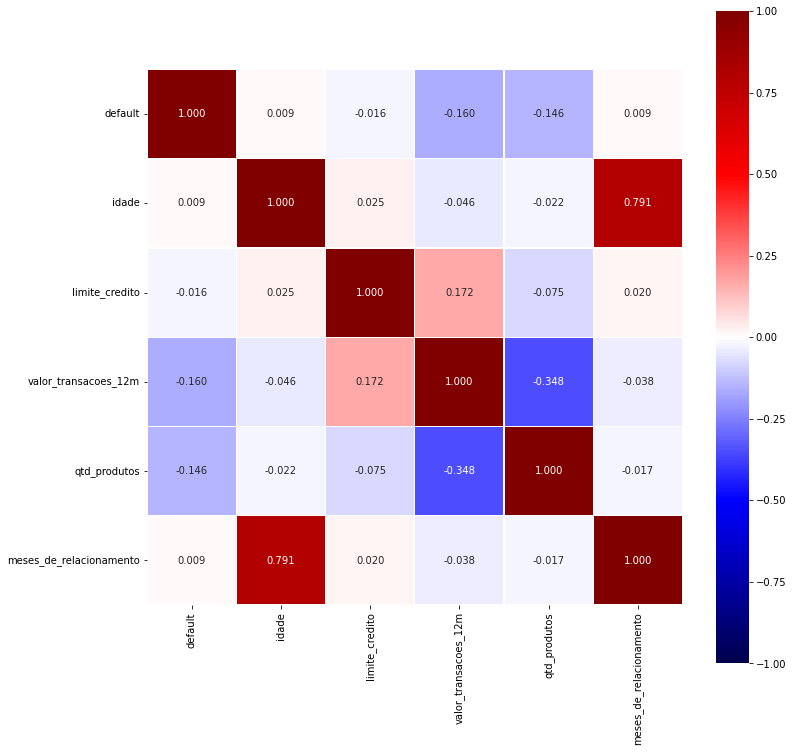

In [23]:
# criar uma matriz de correlação
corr = df[['default','idade', 'limite_credito', 'valor_transacoes_12m', 'qtd_produtos',
    'meses_de_relacionamento']].corr()

# mostrar a matriz de correlação
display(corr)

# mostrar a matriz de correlação
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap='seismic', \
            fmt='.3f',square=True, linecolor='white', annot=True, linewidth=0.3);
plt.savefig('resultado6.png');

####Esta é a matriz gerada, a qual nos permitirá interpretar a relação entre as variáveis. Nessa matriz podemos ver uma escala de cores de tonalidades de azul, vermelho e branco, e uma escala numérica que vai de 1 a -1. O interessante dessa representação gráfica é que além da barra lateral que demonstra a escala numérica do coeficiente e das cores, há também em cada quadrante o valor e a cor referente da relação.

###Com o plote dessa grafico, podemos perceber que a unica coluna que tem corelação e a Idade com meses_de_relacionamento, que no caso faz total sentido, porque quanto mais cedo tempo o cliente tem conta no banco, mais idade ele tera.


##**Vamos separa o cliente em adimplentes e inadimplentes**

In [24]:
#separa os adimplente dos inadimplente
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

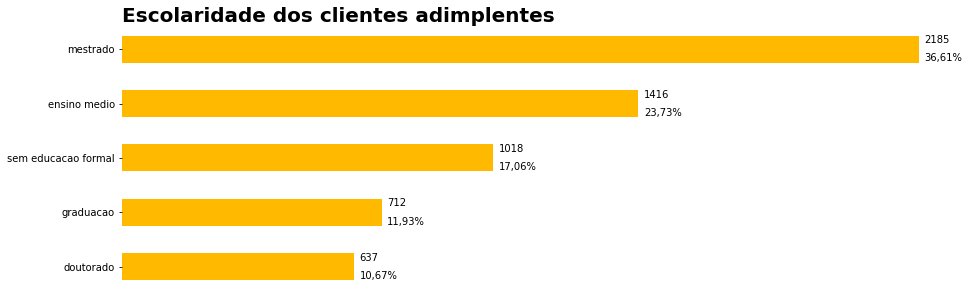

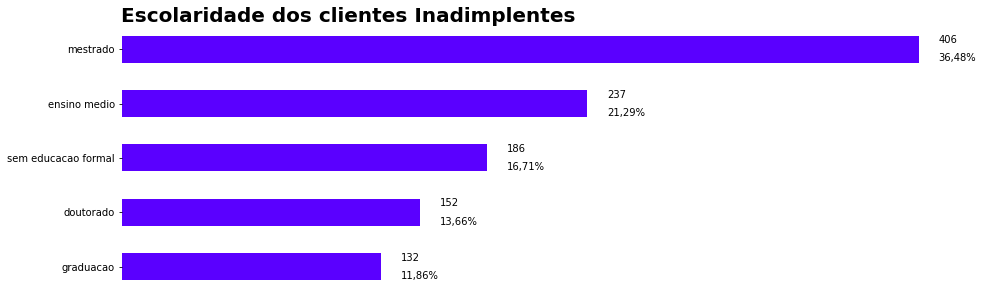

In [25]:
# plotando o gráfico adimplentes
fig, ax = plt.subplots(figsize= (10,5))
n_plots = 5
palette = sns.color_palette("gist_rainbow", n_colors=n_plots)

with palette:
  # ver escolaridade
  ax = df_adimplente.escolaridade.value_counts().sort_values(ascending=True).plot.barh(figsize=(15, 5))
  # plotar título
  plt.text(-0.35, 4.50, 'Escolaridade dos clientes adimplentes',
          fontsize=20,
          weight='bold')

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

  #adicionar labels
  for rect in ax.patches:
    ax.text(rect.get_width() + 15,
          rect.get_y() + rect.get_height()*5/6,
          '{}'.format((rect.get_width())),
          va='center')
    ax.text(rect.get_width() + 15,
          rect.get_y() + rect.get_height()/6,
          '{:.2f}%'.format((rect.get_width()/df_adimplente.shape[0]*100)).replace('.',','),
          va='center') 
plt.savefig('resultado18.png');


#########################################################################################################################


# plotando o gráfico inadimplentes
fig, ax = plt.subplots(figsize= (10,5))
n_plots = 5
palette = sns.color_palette("gist_rainbow_r", n_colors=n_plots)

with palette:
  # ver escolaridade
  ax = df_inadimplente.escolaridade.value_counts().sort_values(ascending=True).plot.barh(figsize=(15, 5))
  # plotar título
  plt.text(-0.35, 4.50, 'Escolaridade dos clientes Inadimplentes',
          fontsize=20,
          weight='bold')

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

  #adicionar labels
  for rect in ax.patches:
    ax.text(rect.get_width() + 10,
          rect.get_y() + rect.get_height()*5/6,
          '{}'.format((rect.get_width())),
          va='center')
    ax.text(rect.get_width() + 10,
          rect.get_y() + rect.get_height()/6,
          '{:.2f}%'.format((rect.get_width()/df_inadimplente.shape[0]*100)).replace('.',','),
          va='center') 
plt.savefig('resultado17.png');

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


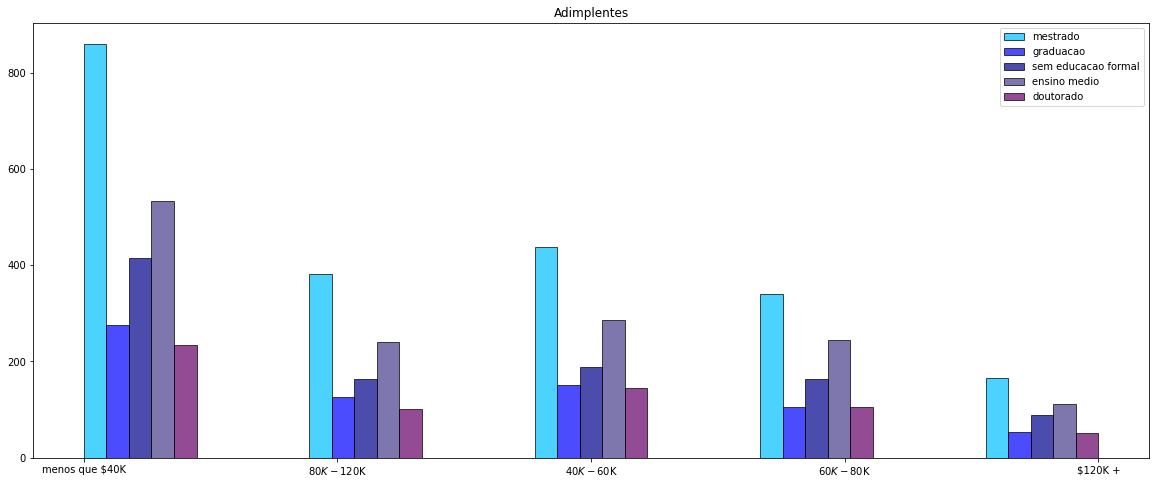

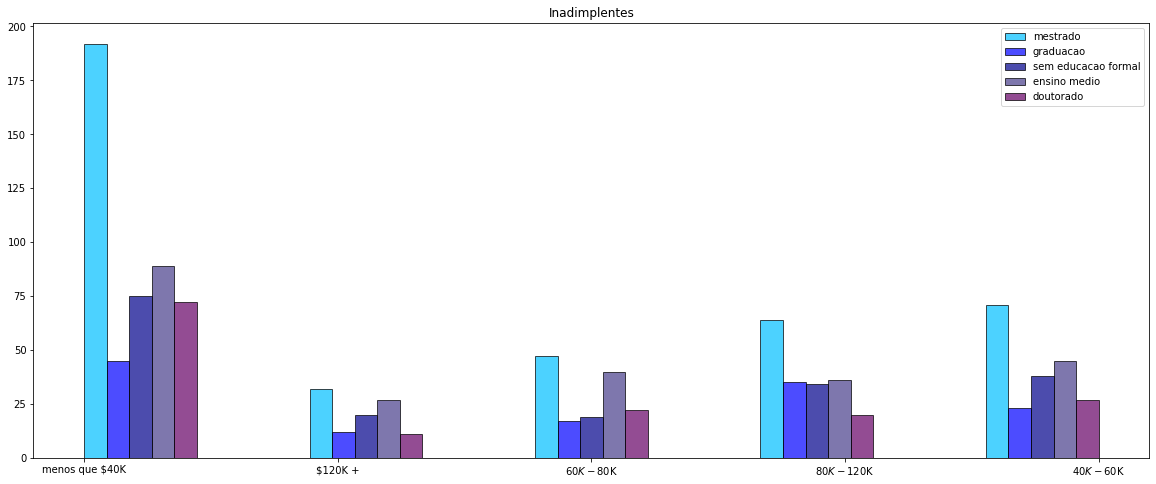

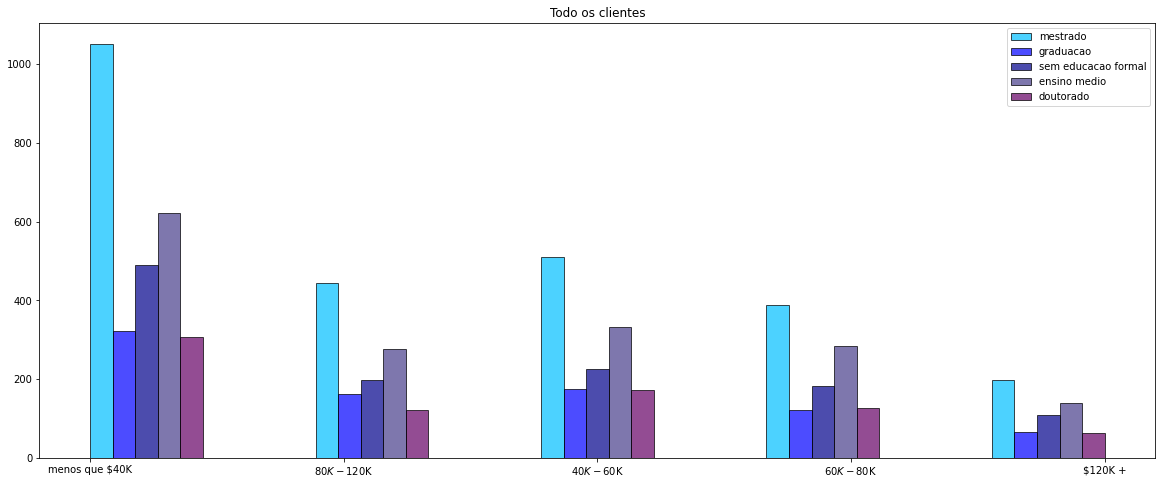

In [26]:
#escolaridade por salario adimplente 
a = df_adimplente['salario_anual'].loc[df_adimplente['escolaridade'] == 'mestrado']
b = df_adimplente['salario_anual'].loc[df_adimplente['escolaridade'] == 'graduacao']
c = df_adimplente['salario_anual'].loc[df_adimplente['escolaridade'] == 'sem educacao formal']
d = df_adimplente['salario_anual'].loc[df_adimplente['escolaridade'] == 'ensino medio']
e = df_adimplente['salario_anual'].loc[df_adimplente['escolaridade'] == 'doutorado']

fig, ax = plt.subplots(figsize=(20,8))
plt.title("Adimplentes")
plt.hist([a, b, c, d, e], label=['mestrado', 'graduacao', 'sem educacao formal', 'ensino medio', 'doutorado'], 
         color=['#00BFFF','#0000FF','#00008B','#483D8B','#660066'],bins=9, rwidth=1, 
         edgecolor='black', alpha=0.7);
plt.legend(loc='upper right')
#plotar grafico
plt.show();

#escolaridade por salario inadimplente
a = df_inadimplente['salario_anual'].loc[df_inadimplente['escolaridade'] == 'mestrado']
b = df_inadimplente['salario_anual'].loc[df_inadimplente['escolaridade'] == 'graduacao']
c = df_inadimplente['salario_anual'].loc[df_inadimplente['escolaridade'] == 'sem educacao formal']
d = df_inadimplente['salario_anual'].loc[df_inadimplente['escolaridade'] == 'ensino medio']
e = df_inadimplente['salario_anual'].loc[df_inadimplente['escolaridade'] == 'doutorado']

fig, ax = plt.subplots(figsize=(20,8))
plt.title("Inadimplentes")
plt.hist([a, b, c, d, e], label=['mestrado', 'graduacao', 'sem educacao formal', 'ensino medio', 'doutorado'], 
         color=['#00BFFF','#0000FF','#00008B','#483D8B','#660066'],bins=9, rwidth=1, edgecolor='black', alpha=0.7);
plt.legend(loc='upper right')
#plotar grafico
plt.show();


#todos clientes
a = df['salario_anual'].loc[df['escolaridade'] == 'mestrado']
b = df['salario_anual'].loc[df['escolaridade'] == 'graduacao']
c = df['salario_anual'].loc[df['escolaridade'] == 'sem educacao formal']
d = df['salario_anual'].loc[df['escolaridade'] == 'ensino medio']
e = df['salario_anual'].loc[df['escolaridade'] == 'doutorado']

fig, ax = plt.subplots(figsize=(20,8))
plt.title("Todo os clientes")
plt.hist([a, b, c, d, e], label=['mestrado', 'graduacao', 'sem educacao formal', 'ensino medio', 'doutorado'], 
         color=['#00BFFF','#0000FF','#00008B','#483D8B','#660066'],bins=9, rwidth=1, edgecolor='black', alpha=0.7);
plt.legend(loc='upper right')
#plotar grafico
plt.show();

####**Analisando so graficos percebemos que os clientes quetem o grau em mestrado, estao em maior numero em todas as faixas salariais, quanto nos cliente adimplente e inadimplentes e tambem sao maioria no dataset inteiro.**


###

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


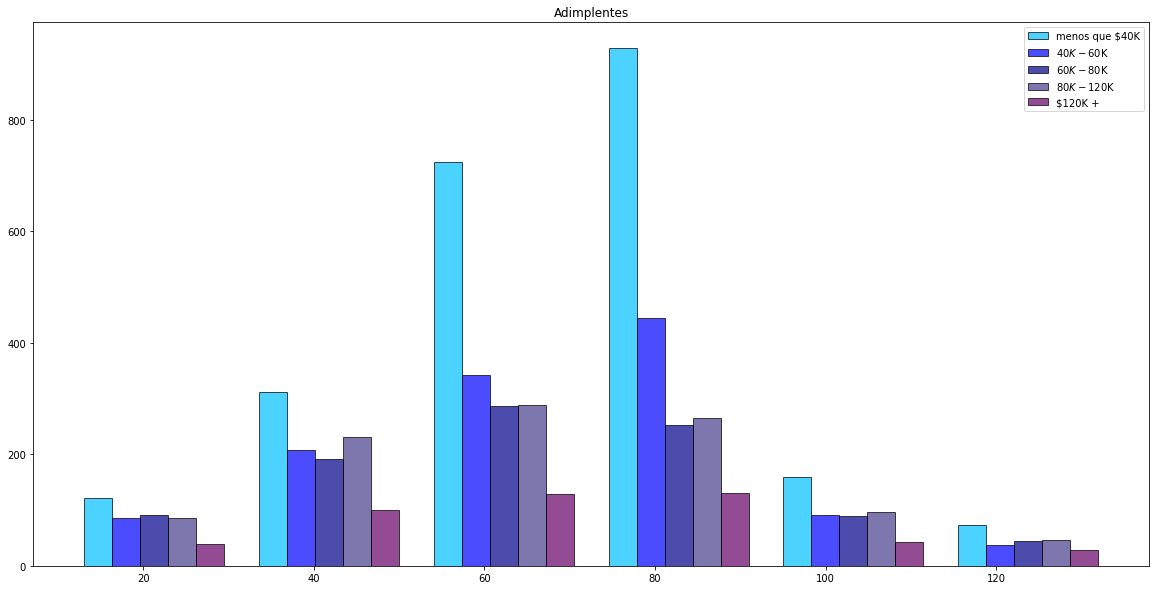

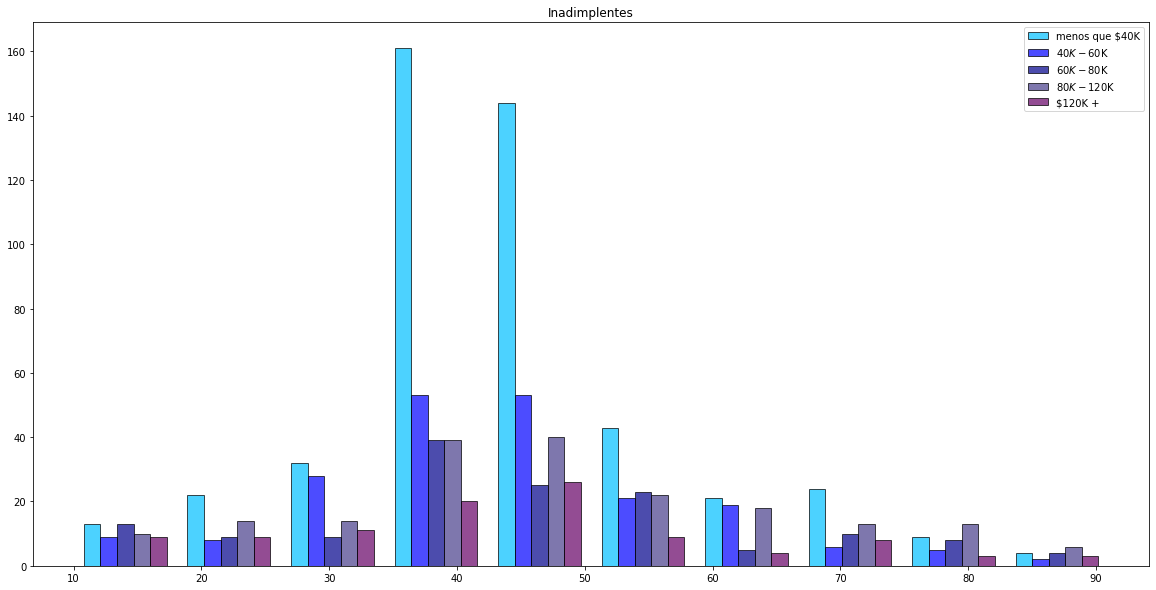

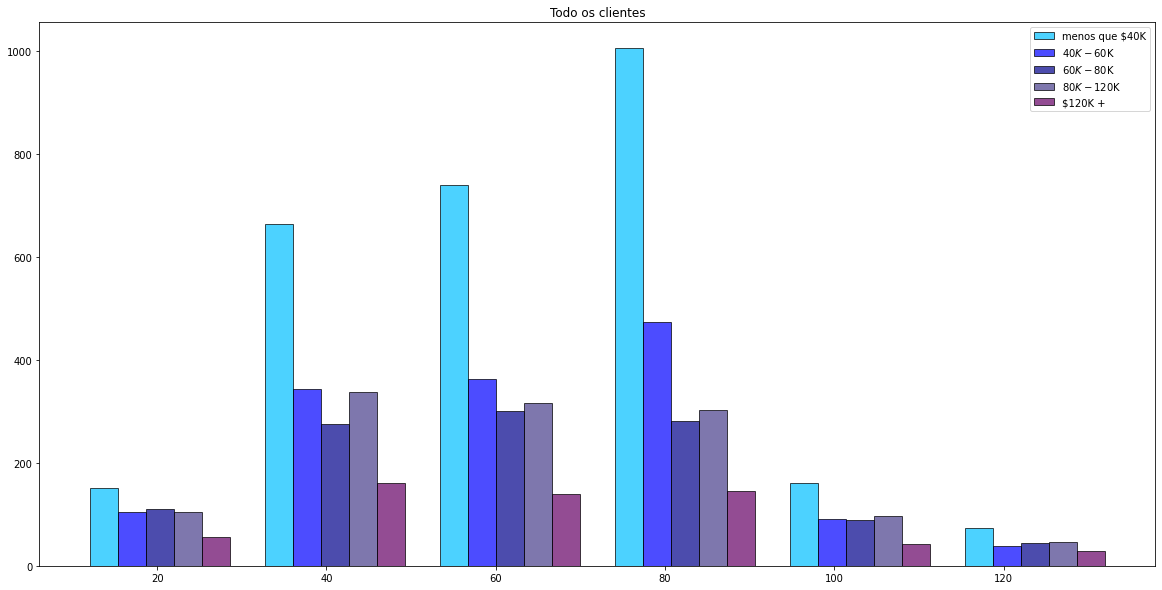

In [27]:
#adimplentes
a = df_adimplente['qtd_transacoes_12m'].loc[df_adimplente['salario_anual'] == 'menos que $40K']
b = df_adimplente['qtd_transacoes_12m'].loc[df_adimplente['salario_anual'] == '$40K - $60K']
c = df_adimplente['qtd_transacoes_12m'].loc[df_adimplente['salario_anual'] == '$60K - $80K']
d = df_adimplente['qtd_transacoes_12m'].loc[df_adimplente['salario_anual'] == '$80K - $120K']
e = df_adimplente['qtd_transacoes_12m'].loc[df_adimplente['salario_anual'] == '$120K +']

#plotar histograma
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Adimplentes")
plt.hist([a,b,c,d,e], label=['menos que $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'], 
         color=['#00BFFF','#0000FF','#00008B','#483D8B','#660066'],bins=6, edgecolor='black', alpha=0.7);
plt.legend(loc='upper right')

#plotar grafico
plt.show()

# Inadimplentes
a = df_inadimplente['qtd_transacoes_12m'].loc[df_inadimplente['salario_anual'] == 'menos que $40K']
b = df_inadimplente['qtd_transacoes_12m'].loc[df_inadimplente['salario_anual'] == '$40K - $60K']
c = df_inadimplente['qtd_transacoes_12m'].loc[df_inadimplente['salario_anual'] == '$60K - $80K']
d = df_inadimplente['qtd_transacoes_12m'].loc[df_inadimplente['salario_anual'] == '$80K - $120K']
e = df_inadimplente['qtd_transacoes_12m'].loc[df_inadimplente['salario_anual'] == '$120K +']

#plotar histograma
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Inadimplentes")
plt.hist([a,b,c,d,e], label=['menos que $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'], 
         color=['#00BFFF','#0000FF','#00008B','#483D8B','#660066'],bins=10, edgecolor='black', alpha=0.7);
plt.legend(loc='upper right')

#plotar grafico
plt.show()

#todos clientes
a = df['qtd_transacoes_12m'].loc[df['salario_anual'] == 'menos que $40K']
b = df['qtd_transacoes_12m'].loc[df['salario_anual'] == '$40K - $60K']
c = df['qtd_transacoes_12m'].loc[df['salario_anual'] == '$60K - $80K']
d = df['qtd_transacoes_12m'].loc[df['salario_anual'] == '$80K - $120K']
e = df['qtd_transacoes_12m'].loc[df['salario_anual'] == '$120K +']

#plotar histograma
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Todo os clientes")
plt.hist([a,b,c,d,e], label=['menos que $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'], 
         color=['#00BFFF','#0000FF','#00008B','#483D8B','#660066'],bins=6, edgecolor='black', alpha=0.7);
plt.legend(loc='upper right')

#plotar grafico
plt.show()

####**Podemos ver que os clientes com a faixa salarial com menos de 40 mil, estao e maiorioria no dataset inteiro;**
####**Este padrão tambem esta nos clientes adimplente, por vista que sao a grande maioria do dataset;**
####**Ja no cliente Inadimplentes a faixa entre '40' e '50', sao a grande maioria, porem entre '80' e '90' o cliente de 80 mil - 120 mil, sao a maioria.**

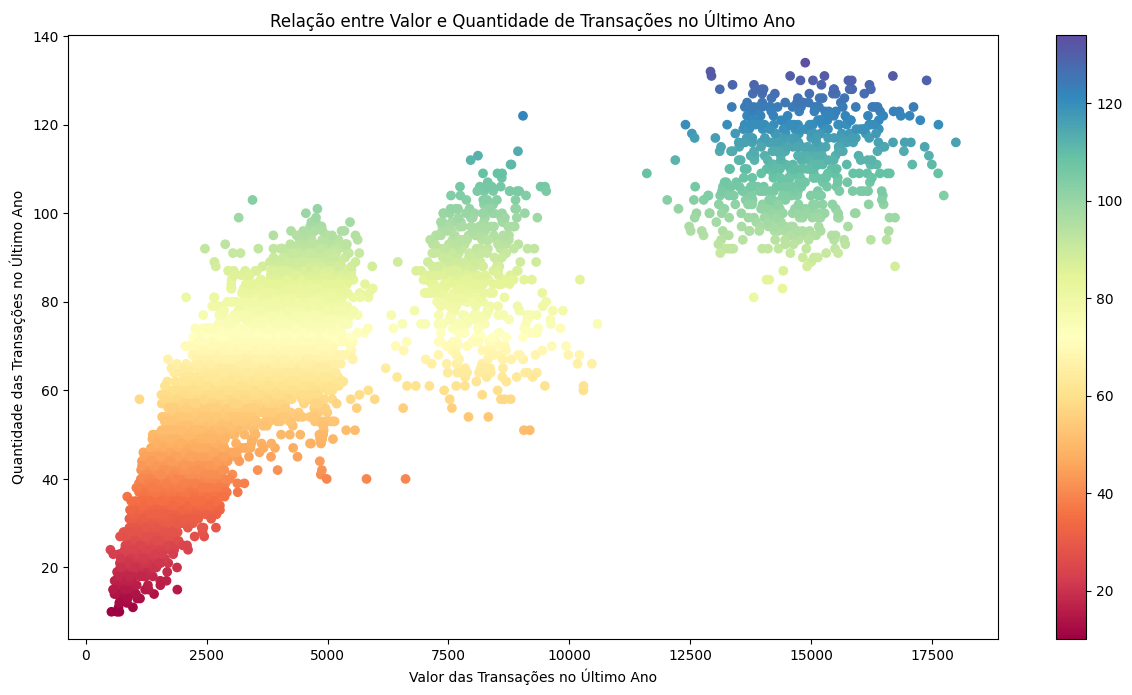

In [42]:
#declarando a colunas que vou usar
x=df['valor_transacoes_12m'],
y=df['qtd_transacoes_12m']

#plotando scatter
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()

#Titulos
plt.title('Relação entre Valor e Quantidade de Transações no Último Ano')
plt.xlabel('Valor das Transações no Último Ano')
plt.ylabel('Quantidade das Transações no Último Ano')

#plotar o grafico
plt.show()

###**Analisando o grafico podemos, ver que os cliente que fazer transaçoes de valores altos, tambem costumam fazer mais transaçoes no ano;**
###**Cliente que fazer transaçoes acima de 12500, costumam, fazer acima de 80 transferencias no ano;**
###**ja os cliente entre 5000 e 1000 mil costumam fazer entre 40 a 80 transferencias no ano;**
###**Agora os cliente abaixo de 5 mil, acabam fazem bem menos transferencias, ficando abaixo de 40.**



